# 따릉이 자전거 대여소 위치

In [1]:
import warnings
warnings.filterwarnings('ignore')

In [2]:
import pandas as pd
from plotnine import *
# 지도 표현을 위해
import folium

# 정규표현식 사용을 위해
import re

In [3]:
df = pd.read_csv('data/seoul_bike/bike_rent_station.csv')
df.shape

(1463, 5)

In [4]:
df.head()

,대여소,상태,주소,위도,경도
0,광진교 남단 사거리(디지털프라자앞),운영중,서울특별시 강동구 구천면로 171 376 남단사거리,37.541805,127.124718
1,해공공원(천호동),운영중,서울특별시 강동구 올림픽로 702 265,37.545219,127.125916
2,해공도서관앞,운영중,서울특별시 강동구 올림픽로 702 367,37.543915,127.125458
3,삼성광나루아파트 버스정류장,운영중,서울특별시 강동구 상암로3길 77 암사동 534,37.553349,127.128860
4,롯데캐슬 115동앞,운영중,서울특별시 강동구 양재대로 1665 명일동 304,37.554920,127.142799


In [5]:
df.head()

,대여소,상태,주소,위도,경도
0,광진교 남단 사거리(디지털프라자앞),운영중,서울특별시 강동구 구천면로 171 376 남단사거리,37.541805,127.124718
1,해공공원(천호동),운영중,서울특별시 강동구 올림픽로 702 265,37.545219,127.125916
2,해공도서관앞,운영중,서울특별시 강동구 올림픽로 702 367,37.543915,127.125458
3,삼성광나루아파트 버스정류장,운영중,서울특별시 강동구 상암로3길 77 암사동 534,37.553349,127.128860
4,롯데캐슬 115동앞,운영중,서울특별시 강동구 양재대로 1665 명일동 304,37.554920,127.142799


In [6]:
df.tail()

,대여소,상태,주소,위도,경도
1458,중랑센터2,운영중,서울특별시 금천구 벚꽃로 309 가산동 371-9 우림라이온스밸리 B동 앞,-67.442963,103.60833
1459,상암센터 정비실,운영중,서울특별시 마포구 월드컵로 251 운영센터,0.000000,0.00000
1460,위트콤,운영중,서울특별시 서초구 방배로 110 위트콤,0.000000,0.00000
1461,위트콤공장,운영중,서울특별시 서초구 방배로 110 석교빌딩 4층,0.000000,0.00000
1462,중랑센터,운영중,서울특별시 성동구 자동차시장 3길 64 (물재생센터) 운영센터,0.000000,0.00000


In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1463 entries, 0 to 1462
Data columns (total 5 columns):
대여소    1463 non-null object
상태     1463 non-null object
주소     1463 non-null object
위도     1463 non-null float64
경도     1463 non-null float64
dtypes: float64(2), object(3)
memory usage: 57.2+ KB


In [8]:
df.isnull().sum()

대여소    0
상태     0
주소     0
위도     0
경도     0
dtype: int64

In [9]:
df.shape

(1463, 5)

In [10]:
geo_df = df.loc[(df['위도'] > 37) & (df['경도'] > 125)]
geo_df.shape

(1456, 5)

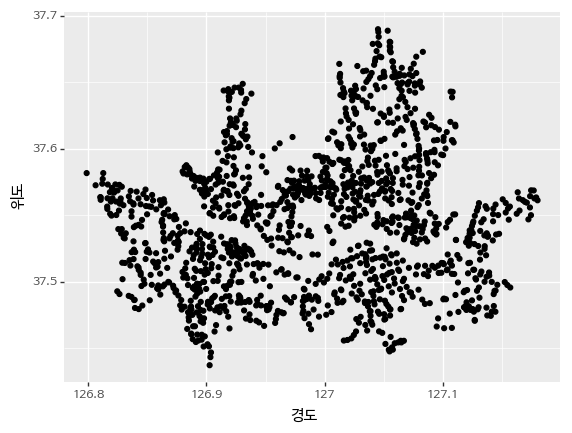

<ggplot: (290862130)>

In [11]:
(ggplot(geo_df)
 + aes(x='경도', y='위도')
 + geom_point()
 + theme(text=element_text(family='NanumBarunGothic'))
)

In [12]:
df.head()

,대여소,상태,주소,위도,경도
0,광진교 남단 사거리(디지털프라자앞),운영중,서울특별시 강동구 구천면로 171 376 남단사거리,37.541805,127.124718
1,해공공원(천호동),운영중,서울특별시 강동구 올림픽로 702 265,37.545219,127.125916
2,해공도서관앞,운영중,서울특별시 강동구 올림픽로 702 367,37.543915,127.125458
3,삼성광나루아파트 버스정류장,운영중,서울특별시 강동구 상암로3길 77 암사동 534,37.553349,127.128860
4,롯데캐슬 115동앞,운영중,서울특별시 강동구 양재대로 1665 명일동 304,37.554920,127.142799


## 구별 데이터 만들기 
* 공백으로 문자를 분리해서 1번째 인덱스에 있는 문자를 가져오도록 구를 생성하였다.
* 그런데 두 번째 문자가 구가 아닌 경우가 있다. 
* 이런 문자들을 개선하기 위해 공백 두 개는 하나로 변경하였다.
* 문자 앞 뒤에 공백문자가 들어가 있는 것을 strip()으로 제거한다.
* 그래도 두 번째 문자가 구가 아닌 문자들이 있다. 해당 문자들만 모아서 '구' 컬럼에 행정구가 들어갈 수 있도록 전처리 작업을 해준다.

In [13]:
df['주소'] = df['주소'].apply(lambda x : re.sub('  ', ' ', x))

In [14]:
df['구'] = df['주소'].apply(lambda x : x.strip().split(' ')[1])

In [15]:
df['구'].value_counts()

강남구         97
영등포구        84
송파구         83
서초구         76
강서구         75
마포구         74
노원구         68
종로구         63
성동구         62
광진구         58
구로구         56
성북구         56
양천구         52
서대문구        50
동대문구        50
은평구         48
관악구         47
중랑구         46
동작구         40
금천구         39
중구          38
용산구         37
강동구         37
강북구         32
도봉구         31
고덕동          5
불광동          4
성내동          4
양재동          3
진관동          3
            ..
가산동          3
면목동          3
강일동          3
미아동          2
암사동          2
잠원동          2
중화동          1
녹번동          1
시흥동          1
창동           1
사당동          1
수유동          1
역촌동          1
양재대로         1
염곡동          1
번동           1
상암동          1
동일로          1
갈현동          1
상봉동          1
신원동          1
상일동          1
관악로          1
독산동          1
길동           1
불광로          1
서울           1
망원2빗물펌프장     1
증산동          1
응암동          1
Name: 구, Length: 62, dtype: int64

* 마지막 글자가 구로 끝나지 않는 데이터를 찾아온다.
* 마지막 글자를 찾을 때는 -1로 마지막 위치의 문자를 가져오도록 한다.

In [16]:
df_gu = df[df['구'].str[-1] != '구']
print(df_gu.shape)
df_gu2 = df_gu['구'].unique()
df_gu2

(64, 6)


array(['성내동', '상일동', '명일동', '길동', '암사동', '고덕동', '강일동', '양재대로', '서울',
       '중화동', '면목동', '상봉동', '미아동', '수유동', '번동', '동일로', '창동', '망원2빗물펌프장',
       '가산동', '시흥동', '독산동', '사당동', '관악로', '서초동', '잠원동', '신원동', '양재동',
       '염곡동', '상암동', '진관동', '응암동', '녹번동', '불광로', '불광동', '증산동', '역촌동',
       '갈현동'], dtype=object)

* 마지막 글자가 구로 끝나지 않는 주소를 가져와서 어떤 구에 속하는지를 찾는다.

In [17]:
df_gu.loc[df_gu['구'].str.find('양재대로') != -1]

,대여소,상태,주소,위도,경도,구
45,굽은다리역,운영중,서울특별시 양재대로 1572 굽은다리역,37.545399,127.142601,양재대로


In [18]:
df_gu.loc[df_gu['구'].str.find('서울') != -1]

,대여소,상태,주소,위도,경도,구
200,가락미륭아파트 앞,운영중,서울특별시 서울 송파구 가락동 195-4 가락미륭아파트 앞,37.493198,127.128998,서울


In [19]:
df_gu.loc[df_gu['구'].str.find('동일로') != -1]

,대여소,상태,주소,위도,경도,구
450,공릉1단지아파트,운영중,서울특별시 동일로 1127 공릉1단지아파트,37.631111,127.07016,동일로


In [20]:
df_gu.loc[df_gu['구'].str.find('관악로') != -1]

,대여소,상태,주소,위도,경도,구
732,관악구 보건소,운영중,서울특별시 관악로 145 관악구 보건소,37.478626,126.951294,관악로


In [21]:
df_gu.loc[df_gu['구'].str.find('신원동') != -1]

,대여소,상태,주소,위도,경도,구
812,서초포레스타 7단지,운영중,서울특별시 신원동 266 서초포레스타 7단지,37.448967,127.057739,신원동


In [22]:
dong = {'성내동':'강동구', '상일동':'강동구'}
dong['성내동']

'강동구'

In [23]:
gu = {'성내동':'강동구', '상일동':'강동구', '명일동':'강동구', '길동':'강동구', '암사동':'강동구', '고덕동':'강동구', '강일동':'강동구', '양재대로':'강동구', '서울':'송파구',
       '중화동':'중랑구', '면목동':'중랑구', '상봉동':'중랑구', '미아동':'강북구', '수유동':'강북구', '번동':'강북구', '동일로':'노원구', '창동':'도봉구', '망원2빗물펌프장':'마포구',
       '가산동':'금천구', '시흥동':'금천구', '독산동':'금천구', '사당동':'동작구', '관악로':'관악구', '서초동':'서초구', '잠원동':'서초구', '신원동':'서초구', '양재동':'서초구',
       '염곡동':'서초구', '상암동':'마포구', '진관동':'은평구', '응암동':'은평구', '녹번동':'은평구', '불광로':'은평구', '불광동':'은평구', '증산동':'은평구', '역촌동':'은평구',
       '갈현동':'은평구'}

In [24]:
df['구'] = df['구'].apply(lambda x : gu[x] if x[-1] != '구' else x )

In [25]:
df['구'].value_counts()

강남구     97
서초구     86
영등포구    84
송파구     84
마포구     76
강서구     75
노원구     69
종로구     63
성동구     62
은평구     61
광진구     58
강동구     57
구로구     56
성북구     56
양천구     52
중랑구     51
동대문구    50
서대문구    50
관악구     48
금천구     44
동작구     41
중구      38
용산구     37
강북구     36
도봉구     32
Name: 구, dtype: int64

In [26]:
# 잘못입력된 위경도로 인해 그래프가 제대로 그려지지 않는 문제를 위해 위경도 범위를 지정
geo_gu_df = df.loc[(df['위도'] > 37) & (df['경도'] > 125)]
geo_gu_df.shape

(1456, 6)

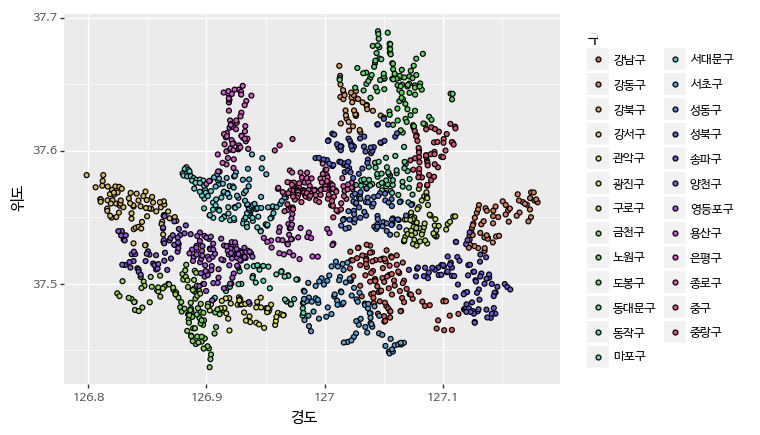

<ggplot: (-9223372036563387925)>

In [27]:
(ggplot(geo_gu_df)
 + aes(x='경도', y='위도', fill='구')
 + geom_point()
 + theme(text=element_text(family='NanumBarunGothic'))
)

* [folium 예제 참고](http://nbviewer.jupyter.org/github/python-visualization/folium/tree/master/examples/)
    * 맵스타일, 히트맵, 마커 등을 커스텀하게 표현한 예제

In [28]:
geo_df = geo_gu_df
map = folium.Map(location=[geo_df['위도'].mean(), geo_df['경도'].mean()], zoom_start=12)

for n in geo_df.index:
    loc_name = geo_df['대여소'][n]
    
    icon_color = 'blue'
    folium.Circle(
        location=[geo_df['위도'][n], geo_df['경도'][n]],
        popup=loc_name,
        radius=20,
        color=icon_color,
        fill=True,
        fill_color=icon_color
    ).add_to(map)
    
map